In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from pydataset import data

import warnings
warnings.filterwarnings('ignore')

In [2]:
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [3]:
df = data('mpg')

In [4]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
series = pd.Series([100, 43, 26, 17])

In [6]:
series

0    100
1     43
2     26
3     17
dtype: int64

In [7]:
letters = pd.Series(np.random.choice(list('abcdefghijklmnopqrstuvwxyz'), 100))

In [8]:
numbers = pd.Series(np.random.choice(np.arange(1, 101), 100))

In [9]:
letters.index

RangeIndex(start=0, stop=100, step=1)

In [10]:
letters.values

array(['z', 'h', 'k', 'r', 'p', 'd', 's', 'i', 'v', 'w', 'q', 'p', 'k',
       'n', 'r', 'h', 'l', 'q', 'j', 'y', 'p', 's', 'b', 'g', 'd', 'n',
       'x', 'u', 'i', 'p', 'h', 'i', 'd', 'r', 'y', 'd', 'f', 'x', 'g',
       'e', 'a', 'v', 'o', 'j', 'f', 'j', 'v', 'b', 'j', 'e', 'u', 'w',
       'n', 's', 'k', 'b', 's', 'v', 't', 'x', 'f', 'x', 'h', 'x', 'i',
       'o', 'p', 'p', 's', 'v', 'm', 'u', 't', 'k', 'n', 'z', 'r', 'w',
       'f', 'v', 'b', 'k', 'y', 'h', 'f', 'j', 'v', 'm', 'x', 'e', 'o',
       'e', 't', 'w', 'l', 'b', 'd', 'n', 's', 'e'], dtype=object)

In [11]:
letters[letters == 'a']

40    a
dtype: object

In [12]:
 letters[letters == 'u']

27    u
50    u
71    u
dtype: object

In [13]:
numbers[numbers > 50].sort_values()

5     51
56    52
18    52
4     53
52    53
36    54
40    54
75    57
29    58
85    59
13    64
14    64
69    65
39    66
51    66
16    66
35    67
93    67
94    69
80    70
15    71
49    74
88    76
7     78
84    78
74    79
8     79
37    80
97    82
33    85
60    85
25    86
57    87
65    88
72    88
82    89
23    90
62    91
24    91
28    98
38    99
dtype: int64

In [14]:
numbers[numbers > 50].count()

41

In [15]:
numbers[numbers % 5 == 0]

11    50
12    45
19    50
23    90
31    10
33    85
37    80
41    20
53    20
58    50
60    85
63    30
69    65
76    45
80    70
86    35
dtype: int64

In [16]:
numbers[~ numbers % 5 == 0]

1     29
3     34
8     79
9     49
10    49
13    64
14    64
36    54
38    99
40    54
42    29
44    39
46    39
48    44
49    74
61    34
68    29
74    79
79    24
81    14
82    89
85    59
94    69
99    29
dtype: int64

In [17]:
greater_than_50_filt = numbers > 50

In [18]:
even_numbers_list = numbers % 2 == 0

In [19]:
is_divisible_by_5 = numbers % 5 == 0

In [20]:
numbers[greater_than_50_filt & even_numbers_list & is_divisible_by_5]

23    90
37    80
80    70
dtype: int64

In [21]:
numbers[~ greater_than_50_filt & even_numbers_list & is_divisible_by_5]

11    50
19    50
31    10
41    20
53    20
58    50
63    30
dtype: int64

In [22]:
vowels = list('aeiou')

In [23]:
letters[letters.isin(vowels)].count()

16

In [24]:
letters[letters.isin(vowels)].shape

(16,)

In [25]:
letters[letters.isin(vowels)].size

16

In [26]:
letter_values = letters[letters.isin(vowels)].value_counts()

In [27]:
letter_percents = letters[letters.isin(vowels)].value_counts(normalize=True)

In [28]:
letter_info = letter_values.to_frame(name = 'count').join(letter_percents.to_frame(name='frequency')) 

In [29]:
type(letter_info)

pandas.core.frame.DataFrame

In [30]:
letter_info

,count,frequency
e,5,0.3125
i,4,0.2500
o,3,0.1875
u,3,0.1875
a,1,0.0625


In [31]:
pd.DataFrame({'count': letter_values,'frequency':letter_percents})

,count,frequency
e,5,0.3125
i,4,0.2500
o,3,0.1875
u,3,0.1875
a,1,0.0625


In [32]:
num_summary = numbers.describe()

In [33]:
iqr = num_summary['75%'] - num_summary['25%']
iqr

38.25

## Functions

In [34]:
def is_divisible_by_4(n):
    if n % 4 == 0:
        return 'Evenly divisible by 4!'
    else:
        return 'Not evenly divisible by 4 :('

In [35]:
is_divisible_by_4(4)

'Evenly divisible by 4!'

In [36]:
numbers.apply(is_divisible_by_4)

0     Not evenly divisible by 4 :(
1     Not evenly divisible by 4 :(
2     Not evenly divisible by 4 :(
3     Not evenly divisible by 4 :(
4     Not evenly divisible by 4 :(
5     Not evenly divisible by 4 :(
6     Not evenly divisible by 4 :(
7     Not evenly divisible by 4 :(
8     Not evenly divisible by 4 :(
9     Not evenly divisible by 4 :(
10    Not evenly divisible by 4 :(
11    Not evenly divisible by 4 :(
12    Not evenly divisible by 4 :(
13          Evenly divisible by 4!
14          Evenly divisible by 4!
15    Not evenly divisible by 4 :(
16    Not evenly divisible by 4 :(
17          Evenly divisible by 4!
18          Evenly divisible by 4!
19    Not evenly divisible by 4 :(
20          Evenly divisible by 4!
21    Not evenly divisible by 4 :(
22    Not evenly divisible by 4 :(
23    Not evenly divisible by 4 :(
24    Not evenly divisible by 4 :(
25    Not evenly divisible by 4 :(
26    Not evenly divisible by 4 :(
27    Not evenly divisible by 4 :(
28    Not evenly div

In [37]:
numbers.value_counts

<bound method IndexOpsMixin.value_counts of 0      2
1     29
2     33
3     34
4     53
5     51
6     37
7     78
8     79
9     49
10    49
11    50
12    45
13    64
14    64
15    71
16    66
17    48
18    52
19    50
20    28
21    21
22     1
23    90
24    91
25    86
26    17
27    27
28    98
29    58
30     6
31    10
32     3
33    85
34    36
35    67
36    54
37    80
38    99
39    66
40    54
41    20
42    29
43    18
44    39
45    46
46    39
47    31
48    44
49    74
50     3
51    66
52    53
53    20
54    41
55     1
56    52
57    87
58    50
59    43
60    85
61    34
62    91
63    30
64    26
65    88
66    41
67    27
68    29
69    65
70    12
71    11
72    88
73    33
74    79
75    57
76    45
77     1
78    47
79    24
80    70
81    14
82    89
83    42
84    78
85    59
86    35
87    17
88    76
89    28
90    37
91    18
92     2
93    67
94    69
95    47
96    13
97    82
98    43
99    29
dtype: int64>

In [38]:
def bin_numbers(n):
    if n < 25:
        return '[0, 25)'
    elif n < 50:
        return '[25, 50)'
    elif n < 75:
        return '[50, 75)'
    else:
        return '[75, 100]'

In [39]:
bin_numbers(40)

'[25, 50)'

In [40]:
numbers.apply(bin_numbers)

0       [0, 25)
1      [25, 50)
2      [25, 50)
3      [25, 50)
4      [50, 75)
5      [50, 75)
6      [25, 50)
7     [75, 100]
8     [75, 100]
9      [25, 50)
10     [25, 50)
11     [50, 75)
12     [25, 50)
13     [50, 75)
14     [50, 75)
15     [50, 75)
16     [50, 75)
17     [25, 50)
18     [50, 75)
19     [50, 75)
20     [25, 50)
21      [0, 25)
22      [0, 25)
23    [75, 100]
24    [75, 100]
25    [75, 100]
26      [0, 25)
27     [25, 50)
28    [75, 100]
29     [50, 75)
30      [0, 25)
31      [0, 25)
32      [0, 25)
33    [75, 100]
34     [25, 50)
35     [50, 75)
36     [50, 75)
37    [75, 100]
38    [75, 100]
39     [50, 75)
40     [50, 75)
41      [0, 25)
42     [25, 50)
43      [0, 25)
44     [25, 50)
45     [25, 50)
46     [25, 50)
47     [25, 50)
48     [25, 50)
49     [50, 75)
50      [0, 25)
51     [50, 75)
52     [50, 75)
53      [0, 25)
54     [25, 50)
55      [0, 25)
56     [50, 75)
57    [75, 100]
58     [50, 75)
59     [25, 50)
60    [75, 100]
61     [25, 50)
62    [7

In [41]:
numbers.apply(bin_numbers).value_counts().sort_index()

[0, 25)      21
[25, 50)     35
[50, 75)     25
[75, 100]    19
dtype: int64

In [42]:
type(numbers.apply(bin_numbers).value_counts())

pandas.core.series.Series

## Binning Data - turns numeric into categorical variable

In [43]:
numbers.value_counts(bins=4)

(25.5, 50.0]     38
(50.0, 74.5]     22
(0.901, 25.5]    21
(74.5, 99.0]     19
dtype: int64

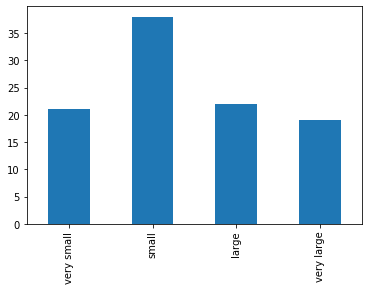

In [44]:
pd.cut(numbers, 4, labels=['very small', 'small', 'large', 'very large']).value_counts().sort_index().plot(kind='bar')
plt.show()

In [45]:
#  pd.cut() creates equal sized bins, but values not distributed equally

pd.cut(numbers, 8).value_counts().sort_index()

(0.902, 13.25]    12
(13.25, 25.5]      9
(25.5, 37.75]     19
(37.75, 50.0]     19
(50.0, 62.25]     10
(62.25, 74.5]     12
(74.5, 86.75]     10
(86.75, 99.0]      9
dtype: int64

In [46]:
#  pd.qcut() distributes values equally throughout the bins

pd.qcut(numbers, 8).value_counts().sort_index()

(0.999, 15.125]    13
(15.125, 28.0]     13
(28.0, 36.125]     12
(36.125, 45.5]     12
(45.5, 52.875]     12
(52.875, 66.25]    13
(66.25, 81.25]     12
(81.25, 99.0]      13
dtype: int64

## String Manipulations

In [47]:
numbers.apply(is_divisible_by_4).str[:4]

0     Not 
1     Not 
2     Not 
3     Not 
4     Not 
5     Not 
6     Not 
7     Not 
8     Not 
9     Not 
10    Not 
11    Not 
12    Not 
13    Even
14    Even
15    Not 
16    Not 
17    Even
18    Even
19    Not 
20    Even
21    Not 
22    Not 
23    Not 
24    Not 
25    Not 
26    Not 
27    Not 
28    Not 
29    Not 
30    Not 
31    Not 
32    Not 
33    Not 
34    Even
35    Not 
36    Not 
37    Even
38    Not 
39    Not 
40    Not 
41    Even
42    Not 
43    Not 
44    Not 
45    Not 
46    Not 
47    Not 
48    Even
49    Not 
50    Not 
51    Not 
52    Not 
53    Even
54    Not 
55    Not 
56    Even
57    Not 
58    Not 
59    Not 
60    Not 
61    Not 
62    Not 
63    Not 
64    Not 
65    Even
66    Not 
67    Not 
68    Not 
69    Not 
70    Even
71    Not 
72    Even
73    Not 
74    Not 
75    Not 
76    Not 
77    Not 
78    Not 
79    Even
80    Not 
81    Not 
82    Not 
83    Not 
84    Not 
85    Not 
86    Not 
87    Not 
88    Even
89    Even
90    Not 

In [48]:
numbers.apply(is_divisible_by_4).str.lower()

0     not evenly divisible by 4 :(
1     not evenly divisible by 4 :(
2     not evenly divisible by 4 :(
3     not evenly divisible by 4 :(
4     not evenly divisible by 4 :(
5     not evenly divisible by 4 :(
6     not evenly divisible by 4 :(
7     not evenly divisible by 4 :(
8     not evenly divisible by 4 :(
9     not evenly divisible by 4 :(
10    not evenly divisible by 4 :(
11    not evenly divisible by 4 :(
12    not evenly divisible by 4 :(
13          evenly divisible by 4!
14          evenly divisible by 4!
15    not evenly divisible by 4 :(
16    not evenly divisible by 4 :(
17          evenly divisible by 4!
18          evenly divisible by 4!
19    not evenly divisible by 4 :(
20          evenly divisible by 4!
21    not evenly divisible by 4 :(
22    not evenly divisible by 4 :(
23    not evenly divisible by 4 :(
24    not evenly divisible by 4 :(
25    not evenly divisible by 4 :(
26    not evenly divisible by 4 :(
27    not evenly divisible by 4 :(
28    not evenly div

## Plotting

- gives each number by index using .plot()

- you can use this quick plotting method on Series only

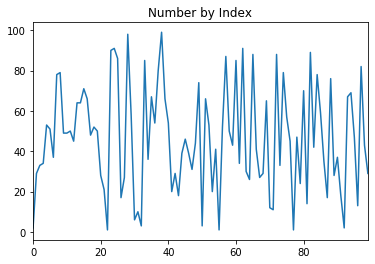

In [49]:
numbers.plot()
plt.title('Number by Index')

plt.show()

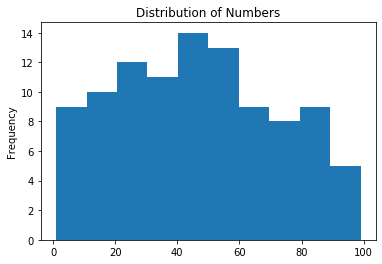

In [50]:
numbers.plot.hist()
plt.title('Distribution of Numbers')

plt.show()

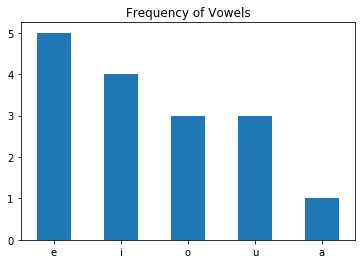

In [51]:
letters[letters.isin(vowels)].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Frequency of Vowels')

plt.show()

## Exercises

## Create Series named fruits

In [52]:
fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"]
)

In [53]:
type(fruits)

pandas.core.series.Series

### unique fruits only

In [54]:
fruits.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

### number of unique fruits in fruits Series

In [55]:
fruits.nunique()

13

### Frequency of fruits

In [56]:
fruits.value_counts()

kiwi                4
mango               2
tomato              1
gooseberry          1
gala apple          1
blueberry           1
papaya              1
honeycrisp apple    1
strawberry          1
watermelon          1
honeydew            1
pineapple           1
blackberry          1
dtype: int64

### Most frequent fruit

In [57]:
fruits.value_counts().sort_values(ascending=False).head(1)

kiwi    4
dtype: int64

### Least frequent fruits

In [58]:
fruits.value_counts().sort_values().head(11)

tomato              1
gooseberry          1
gala apple          1
blueberry           1
papaya              1
honeycrisp apple    1
strawberry          1
watermelon          1
honeydew            1
pineapple           1
blackberry          1
dtype: int64

### Longest name in fruits

In [59]:
fruits[fruits.str.len() == fruits.str.len().max()]

5    honeycrisp apple
dtype: object

### Fruits with 5 or more letters in their names

In [60]:
fruits[fruits.str.len() > 4]

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

### Capitalize all of the fruits

In [61]:
fruits.str.capitalize()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala apple
5     Honeycrisp apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

### Count the letter a in the fruits in the Series

In [62]:
fruits.str.count('a')

0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
dtype: int64

#### total of letter a in all of the fruits

In [63]:
fruits.str.count('a').sum()

14

### Output the number of vowels in each fruit

In [ ]:
def is_vowel(x):
    return x in 'aeiou'

In [112]:
def count_vowel(string):
    count = 0
    for s in string:
        if is_vowel(s):
            count += 1
    return count

In [113]:
fruits.apply(count_vowel)

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [64]:
fruits.str.count(r'[aeiou]')

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

### Use the .apply method and a lambda function to find the fruit(s) containing two or more "o" letters in the name.

In [66]:
fruits[fruits.str.count('o') > 1]

6         tomato
15    gooseberry
dtype: object

In [107]:
fruits[fruits.apply(lambda row: row.lower().count('o') >= 2)]

6         tomato
15    gooseberry
dtype: object

### Write the code to get only the fruits containing "berry" in the name



In [69]:
fruits[fruits.str.contains('berry')]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

### Write the code to get only the fruits containing "apple" in the name



In [70]:
fruits[fruits.str.contains('apple')]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

### Which fruit has the highest amount of vowels?



In [71]:
fruits[fruits.str.count(r'[aeiou]')].sort_index().tail(1)

5    honeycrisp apple
dtype: object

## Create a series of Exam Grades

In [72]:
numbers = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78]
)

### Stats for Exam Grades

In [73]:
numbers.min()

60

In [74]:
numbers.max()

96

In [75]:
numbers.mean()

78.15

In [76]:
numbers.median()

79.0

### Plot exam grades

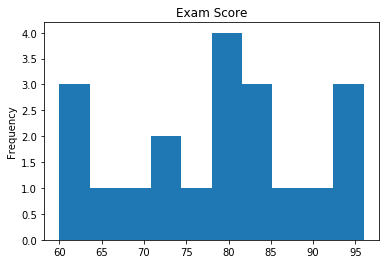

In [77]:
numbers.plot.hist()
plt.title('Exam Score')

plt.show()

## Create a Series from the following

In [118]:
dollars = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23'])

### What is the dtype of the values?


In [119]:
dollars.dtype

dtype('O')

### Use series operations to convert the series to a numeric data type.


In [120]:
dollars = dollars.str.strip(r'\$').str.replace(',', '').astype('float')

In [116]:
dollars

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64

### What is the maximum value? The minimum?


In [82]:
dollars.max()

4789988.17

In [83]:
dollars.min()

278.6

### Bin the data into 4 equally sized intervals and show how many values fall into each bin.

In [84]:
pd.cut(dollars, bins=4).sort_index().value_counts()

(-4511.11, 1197705.993]       7
(3592560.778, 4789988.17]     6
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
dtype: int64

### Plot a histogram of the data. Be sure to include a title and axis labels.


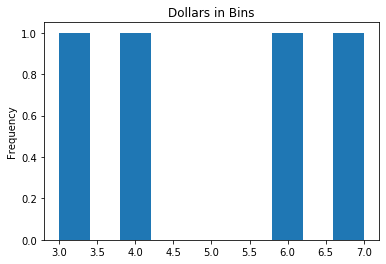

In [85]:
pd.cut(dollars, bins=4).value_counts().sort_index().plot(kind='hist')
plt.title('Dollars in Bins')

plt.show()

### Convert each of the numbers above into a letter grade. For example, 86 should be a 'B' and 95 should be an 'A'.


In [86]:
def bin_grades(n):
    if n >= 90:
        return '[90, 100]'
    elif n >= 80:
        return '[80, 90)'
    elif n >= 70:
        return '[70, 80)'
    else:
        return '[0, 70]'

In [87]:
numbers.apply(bin_grades).value_counts().sort_index()

[0, 70]      5
[70, 80)     5
[80, 90)     6
[90, 100]    4
dtype: int64

In [88]:
def bin_letter_grades(n):
    if n >= 90:
        return 'A'
    elif n >= 80:
        return 'B'
    elif n >= 70:
        return 'C'
    else:
        return 'F'

In [89]:
numbers.apply(bin_letter_grades).value_counts().sort_index()

A    4
B    6
C    5
F    5
dtype: int64

In [121]:
curved_grades = numbers + (100 - numbers.max())
curved_grades.value_counts().sort_index(ascending=False)

100    1
99     1
97     1
96     1
90     1
89     1
87     1
86     1
85     1
84     1
82     2
79     1
76     1
75     1
73     1
69     1
66     1
64     2
dtype: int64

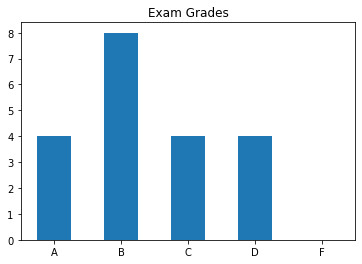

In [131]:
binned_grades = pd.cut(curved_grades, [0, 60, 70, 80, 90, 100], labels=["F", "D", "C", "B", "A"])
binned_grades.value_counts().sort_index(ascending=False).plot(kind='bar')

plt.title('Exam Grades')
plt.xticks(rotation=0)
plt.show()


## Create a Series from the following string

In [91]:
lets = pd.Series(list('hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'))

In [92]:
lets

0      h
1      n
2      v
3      i
4      d
      ..
195    r
196    o
197    g
198    u
199    y
Length: 200, dtype: object

### What is the most frequently occuring letter? Least frequently occuring?


In [93]:
lets.value_counts().head(1)

y    13
dtype: int64

In [94]:
lets.value_counts().tail(1)

l    4
dtype: int64

### How many vowels are in the list?

In [95]:
def is_vowel(x):
    return x in 'aeiou'

In [96]:
lets.apply(is_vowel).sum()

34

In [97]:
lets.str.contains(r'[aeiou]').sum()

34

In [98]:
def is_consonant(x):
    return x not in 'aeiou'

In [99]:
lets.apply(is_consonant).sum()

166

### Create a series that has all of the same letters, but uppercased

In [100]:
uppers = lets.str.upper()
uppers

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object

### Create a bar plot of the frequencies of the 6 most frequently occuring letters.

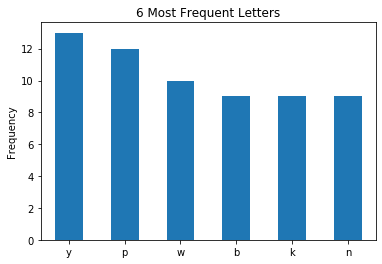

In [101]:
lets.value_counts().head(6).plot(kind='bar')

plt.title('6 Most Frequent Letters')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()